--2020-12-02 23:50:12--  https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg [following]
--2020-12-02 23:50:13--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg.3’

Marquette.jpg.3     100%[===================>] 471.02K  --.-KB/s    in 0.04s   

2020-12-02 23:50:13 (10.7 MB/s) - ‘Marquette.jpg.3’ saved [482326/482326]



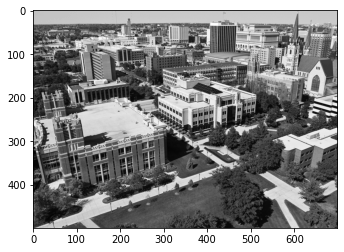

In [58]:
import cv2
import scipy
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg'
img = cv2.imread('Marquette.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,'gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


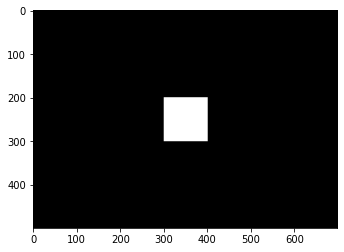

In [59]:
# Plot Mask
import numpy as np
img_fft = np.fft.fft2(img)
shifted_fft_img = abs(np.fft.fftshift(img_fft))

# mask that is q in pixels (200<i<300 or 300<j<400  and zero otherwise)
mask_img = np.zeros(shifted_fft_img.shape).astype(complex)
mask_img[200:301, 300:401] = np.ones((101,101)).astype(complex)


plt.imshow(255.0 * mask_img.astype(int),'gray')
plt.show()

apply filter into frourier transform image and reconstruct it


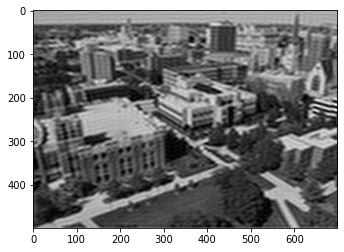

In [60]:
# inverse Transform
shifted_fft_img = np.fft.fftshift(img_fft)

# mask that is q in pixels (200<i<300 or 300<j<400  and zero otherwise) 
# means low pass filter ==> blurry image
mask_img = np.zeros(shifted_fft_img.shape).astype(complex)
mask_img[200:301, 300:401] = np.ones((101,101)).astype(complex)

mask_fft_img = mask_img * shifted_fft_img

# visualize the mask
# mag_img = abs(mask_fft_img)
# mag_img = np.log(mag_img)
# mag_img = (mag_img/np.max(mag_img)*255).astype(int)
# plt.imshow(mag_img,'gray')
# plt.show()


# reconstruct Image
recon_img = np.fft.ifft2(np.fft.ifftshift(mask_fft_img))

plt.imshow(abs(recon_img), 'gray')
plt.show()

if we decrease mask size ==> blurrier image

Ideal Low pass Filter:
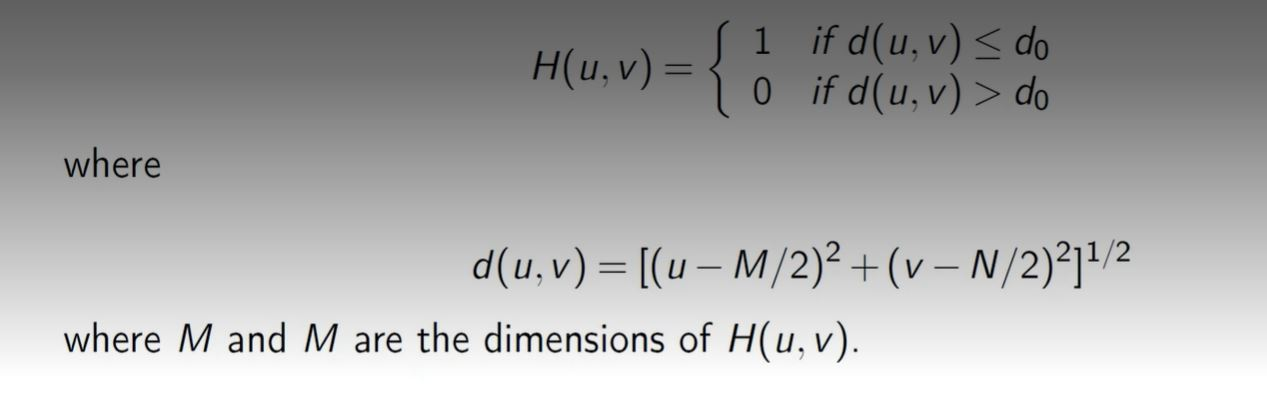

xv [[  0   1   2 ... 697 698 699]
 [  0   1   2 ... 697 698 699]
 [  0   1   2 ... 697 698 699]
 ...
 [  0   1   2 ... 697 698 699]
 [  0   1   2 ... 697 698 699]
 [  0   1   2 ... 697 698 699]]
yv [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [497 497 497 ... 497 497 497]
 [498 498 498 ... 498 498 498]
 [499 499 499 ... 499 499 499]]


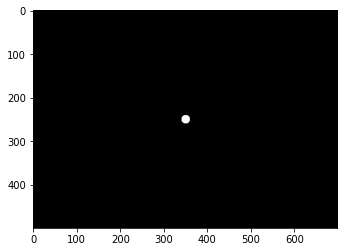

In [61]:
# use meshgrid to produce filter d(u,v)
dims = img.shape
d0 = 10
# make filter with same size as image
x= range(dims[1])
y = range(dims[0])

xv, yv = np.meshgrid(x,y)

print('xv',xv)
print('yv',yv)

# find euledian distance
ilpf_mask = np.linalg.norm([xv - dims[1]/2, yv-dims[0]/2 ], axis=0) <d0

plt.imshow(255*ilpf_mask, 'gray')
plt.show()


[]

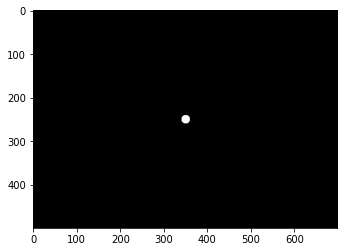

In [62]:
# or to make it more clarify:
# euclidian distance:
duv = np.linalg.norm([xv - dims[1]/2, yv-dims[0]/2 ], axis=0) 

ilpf_mask = duv <d0

plt.imshow(255*ilpf_mask,'gray')
plt.plot()

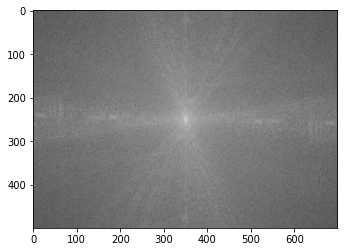

In [63]:
img_fft = np.fft.fft2(img)
mag_img = abs(np.fft.fftshift(img_fft))
mag_img = np.log(mag_img)
mag_img = (mag_img/np.max(mag_img)*255).astype(int)
# black image so need transformation

plt.imshow(mag_img,'gray')
plt.show()


In [64]:
def plotMagnitude(fft_img):
  mag_img = abs(fft_img)
  mag_img = np.log(mag_img + 1e-7)
  max_img = np.max(mag_img).astype(float)
  mag_img = (mag_img /max_img*255.0).astype(int)

  plt.imshow(mag_img, 'gray')
  plt.show()


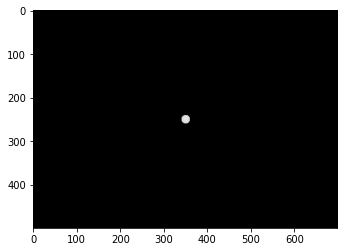

In [65]:
# inverse transform:
# fft_img = np.fft.fft2(img, s = None, axes= (-2,-1))
# plotMagnitude(np.fft.fftshift(filt_fft_img))

#ideal low pass filter mask
filt_fft_img = np.fft.fftshift(img_fft)*ilpf_mask
# plt.imshow(filt_fft_img)
plotMagnitude(filt_fft_img)

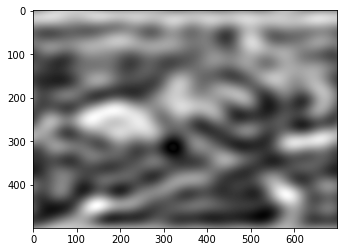

In [66]:
#reconstract image:
Img_rec = abs(np.fft.ifft2(filt_fft_img))
plt.imshow(Img_rec,'gray')

Ringing effect of the lowpass filter

[]

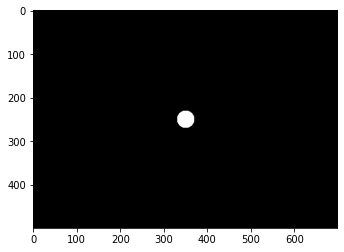

In [67]:
dims = img.shape
d0 = 20

x= range(dims[1])
y = range(dims[0])

xv, yv = np.meshgrid(x,y)

duv = ((xv-dims[1]/2)**2 +(yv-dims[0]/2)**2)**0.5 

ilpf_mask = duv <d0

plt.imshow(255*ilpf_mask,'gray')
plt.plot()


Butterworth lowpass filter
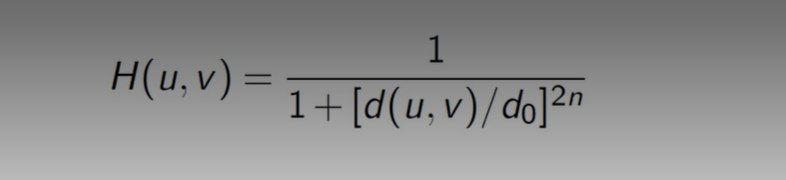

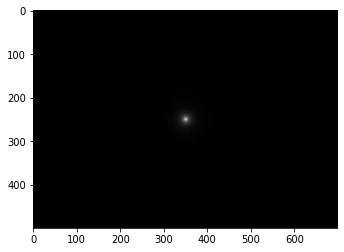

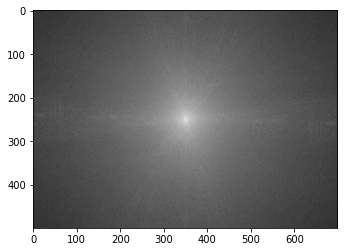

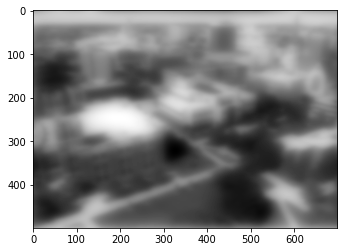

In [68]:
dims = img.shape
d0 = 20
n =2
x= range(dims[1])
y = range(dims[0])

xv, yv = np.meshgrid(x,y)

duv = np.linalg.norm([xv - dims[1]/2, yv-dims[0]/2 ], axis=0) 

mask_bw = 1.0/((1.0+(duv)/d0)**(2**n))

plt.imshow(255*mask_bw,'gray')
plt.plot()
plt.show()


bw_filt_fft_img = np.fft.fftshift(fft_img) * mask_bw
plotMagnitude(bw_filt_fft_img)

Img_rec_bw = abs(np.fft.ifft2(bw_filt_fft_img))
plt.imshow(Img_rec_bw,'gray')

Gaussian lowpass filter

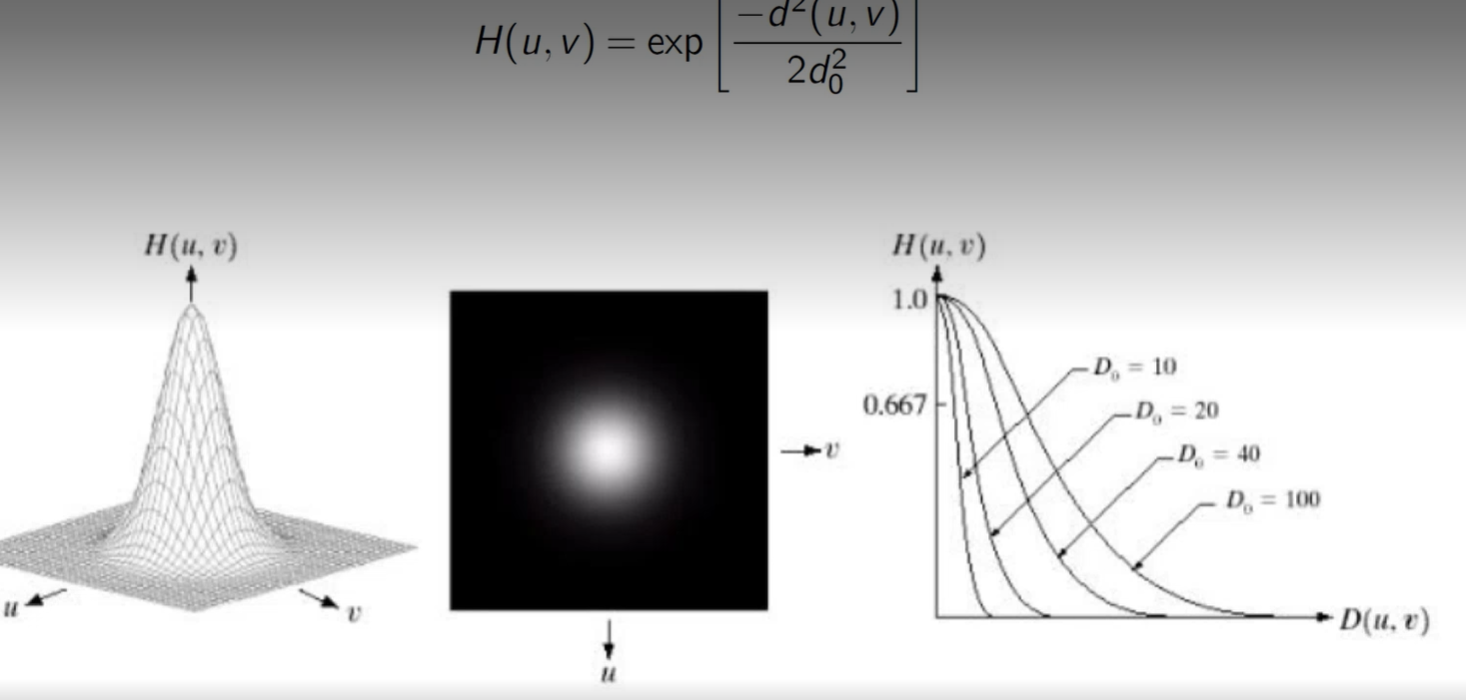

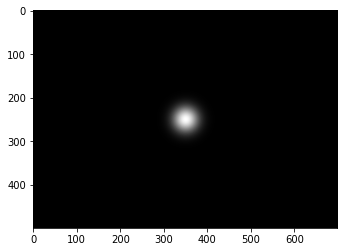

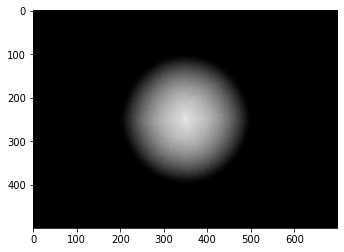

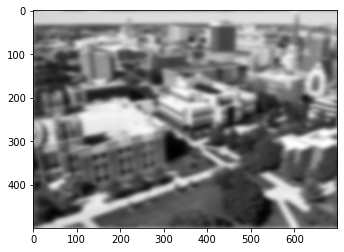

In [74]:
dims = img.shape
d0 = 20
n =2
x= range(dims[1])
y = range(dims[0])

xv, yv = np.meshgrid(x,y)

duv = np.linalg.norm([xv - dims[1]/2, yv-dims[0]/2 ], axis=0) 

mask_gauss = np.exp(-(duv**2)/(2*d0**2))

plt.imshow(255*mask_gauss,'gray')
plt.plot()
plt.show()

gauss_filt_ffy_img = np.fft.fftshift(fft_img) * mask_gauss
plotMagnitude(gauss_filt_ffy_img)

Img_rec_gauss = abs(np.fft.ifft2(gauss_filt_ffy_img))
plt.imshow(Img_rec_gauss,'gray')